In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
import numpy as np
import os
import random
import sys
import pickle
import math

from IPython.display import Video
from sparsenet import longest_shortest_path
from time import time
from multiprocessing import Pool, cpu_count

In [2]:
G = nx.Graph()
G = nx.readwrite.gexf.read_gexf('fabula/combined.gexf').to_undirected()

In [3]:
connected_nodes = sorted(nx.connected_components(G), key=lambda comp: len(comp))[-1]
component = G.subgraph(connected_nodes)

In [4]:
path = ['http://www.semanticweb.org/tonka/ontologies/2015/5/tmi-atu-ontology#169B*', 'http://www.semanticweb.org/tonka/ontologies/2015/5/tmi-atu-ontology#169*', 'http://www.semanticweb.org/tonka/ontologies/2015/5/tmi-atu-ontology#Wild_Animals_and_Humans_150–199', 'http://www.semanticweb.org/tonka/ontologies/2015/5/tmi-atu-ontology#157', 'http://www.semanticweb.org/tonka/ontologies/2015/5/tmi-atu-ontology#J17', 'http://www.semanticweb.org/tonka/ontologies/2015/5/tmi-atu-ontology#J', 'http://www.semanticweb.org/tonka/ontologies/2015/5/tmi-atu-ontology#J2073', 'http://www.semanticweb.org/tonka/ontologies/2015/5/tmi-atu-ontology#750A', '2708', 'INF92', '1916', 'http://www.semanticweb.org/tonka/ontologies/2015/5/tmi-atu-ontology#2025', '2898', 'INF72', '2900']
try:
    with open('pos.pickle', 'rb') as f:
        pos = pickle.load(f)
except:
    pos = nx.spring_layout(component)
    with open('pos.pickle', 'wb') as f:
        pickle.dump(pos, f)

In [5]:
paths = list(nx.algorithms.all_shortest_paths(component, path[0], path[-1]))

In [ ]:
for path in nx.algorithms.all_shortest_paths(component, path[0], path[-1]):
    r = lambda: random.randint(0,255)
    color = '#%02X%02X%02X' % (r(),r(),r())
    nx.draw_networkx_nodes(component, pos, nodelist=path, node_size=1, node_color=color)
    nx.draw_networkx_edges(component, pos, edgelist=[(src, dest) for src, dest in zip(path, path[1:])], edge_size=1, edge_color=color)
plt.savefig('plots/all-longest.png')
plt.clf()

In [ ]:
for i, path in enumerate(nx.algorithms.all_shortest_paths(component, path[0], path[-1])):
    nx.draw_networkx_nodes(component, pos, nodelist=path, node_size=1)
    nx.draw_networkx_edges(component, pos, edgelist=[(src, dest) for src, dest in zip(path, path[1:])], edge_size=1, edge_color=color)
    nx.draw_networkx_nodes(component, pos, nodelist=component, node_size=1, node_color='white', alpha=0)
    plt.savefig('plots/all-longest-%s.png'%i)
    plt.clf()

os.system("ffmpeg -pattern_type glob -i 'plots/all-longest-*.png' -vf 'fps=25,format=yuv420p' -y plots/all-longest.mp4")

KeyboardInterrupt: 

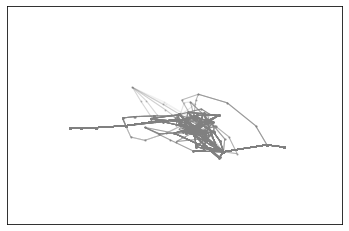

In [8]:
%%time

os.system('rm -rf plots/all-longest-cumulative-*.png')

for i, path in enumerate(paths):
    nx.draw_networkx_nodes(component, pos, nodelist=component, node_size=1, node_color='grey', alpha=0)
    for j, prev in enumerate(paths[:i]):
        nx.draw_networkx_nodes(component, pos, nodelist=prev, node_size=1, node_color='grey', alpha=j/i)
        nx.draw_networkx_edges(component, pos, edgelist=[(src, dest) for src, dest in zip(prev, prev[1:])], edge_size=1, edge_color='grey', alpha=j/i)
    nx.draw_networkx_nodes(component, pos, nodelist=path, node_size=1, node_color='red')
    nx.draw_networkx_edges(component, pos, edgelist=[(src, dest) for src, dest in zip(path, path[1:])], edge_size=1, edge_color='red')
    plt.savefig('plots/all-longest-cumulative-%4d.png'%i)
    plt.clf()

os.system("ffmpeg -i plots/all-longest-cumulative-%4d.png -vf 'fps=25,format=yuv420p' -y plots/all-longest-cumulative.mp4")
Video('plots/all-longest-cumulative.mp4')

In [53]:
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets

@interact(start=IntSlider(min=0, max=len(paths), step=1, value=0), stop=IntSlider(min=0, max=len(paths), step=1, value=len(paths)))
def g(start, stop):
    path = paths[stop-1]
    nx.draw_networkx_nodes(component, pos, nodelist=component, node_size=1, node_color='grey', alpha=0)
    for j, prev in enumerate(paths[max(start, stop-100):stop-1]):
        alpha = abs(j/min(stop-start, 100)) / 10
        nx.draw_networkx_edges(component, pos, edgelist=[(src, dest) for src, dest in zip(prev, prev[1:])], edge_size=1, edge_color='grey', alpha=alpha)
    nx.draw_networkx_nodes(component, pos, nodelist=path, node_size=1, node_color='red')
    nx.draw_networkx_edges(component, pos, edgelist=[(src, dest) for src, dest in zip(path, path[1:])], edge_size=1, edge_color='red')
    plt.title('Paths %s to %s'%(start, stop))
    plt.show()

interactive(children=(IntSlider(value=0, description='start', max=1116), IntSlider(value=1116, description='st…